In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Plot the count of 'Bitcoin' and the pricing of 'Bitcoin' market
daily_bitcoin_pricing = pd.read_csv('bitcoin-24hv0.csv')
daily_bitcoin_pricing['Pricing'] = daily_bitcoin_pricing['Series 1']
daily_bitcoin_pricing = daily_bitcoin_pricing.drop(['Series 1'], axis=1)
print(daily_bitcoin_pricing.head())
# count of bitcoin occurrances in medias
daily_bitcoin_count = pd.read_csv('tmp/daily_bitcoin_count.csv')
daily_bitcoin_count.head()

              DateTime  Pricing
0  2013-04-28 00:00:00   135.30
1  2013-04-29 00:00:00   134.44
2  2013-04-30 00:00:00   144.00
3  2013-05-01 00:00:00   139.00
4  2013-05-02 00:00:00   116.38


,count,date
0,1,2013-01-01 00:00:00
1,6,2013-01-02 00:00:00
2,8,2013-01-03 00:00:00
3,5,2013-01-04 00:00:00
4,4,2013-01-05 00:00:00


In [39]:
# daily_bitcoin_pricing_2014_2015 = daily_bitcoin_pricing[(daily_bitcoin_pricing['DateTime'] >= '2014-01-01 00:00:00') & (daily_bitcoin_pricing['DateTime'] < '2016-01-01 00:00:00')]
# daily_bitcoin_count_2014_2015 = daily_bitcoin_count[(daily_bitcoin_count['date'] >= '2014-01-01 00:00:00') & (daily_bitcoin_count['date'] < '2016-01-01 00:00:00')]
# print(daily_bitcoin_pricing_2014_2015.head())
# print("len of 2014_2015 bitcoin pricing is {}".format(len(daily_bitcoin_pricing_2014_2015['DateTime'])))
# print("len of 2014_2015 bitcoin count is {}".format(len(daily_bitcoin_count_2014_2015['date'])))
daily_bitcoin_pricing_count = pd.merge(daily_bitcoin_pricing, daily_bitcoin_count, 
                                       how='inner', left_on='DateTime', right_on='date').drop(['date'], axis=1)
daily_bitcoin_pricing_count['DateTime'] = [x[:10] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['day'] = [x[8:10] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['month'] = [x[5:7] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['year'] = [x[0:4] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['DateTime'] = pd.to_datetime(daily_bitcoin_pricing_count['DateTime'])
print(daily_bitcoin_pricing_count.head())
daily_bitcoin_pricing_count.describe()
daily_bitcoin_pricing_count.dtypes

    DateTime  Pricing  count day month  year
0 2013-04-28   135.30     18  28    04  2013
1 2013-04-29   134.44     46  29    04  2013
2 2013-04-30   144.00     29  30    04  2013
3 2013-05-01   139.00     45  01    05  2013
4 2013-05-02   116.38     90  02    05  2013


DateTime    datetime64[ns]
Pricing            float64
count                int64
day                 object
month               object
year                object
dtype: object

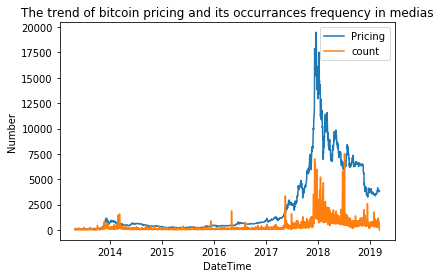

In [45]:
# daily_bitcoin_pricing_count01 = daily_bitcoin_pricing_count[daily_bitcoin_pricing_count['day'] == '01']
# fig, ax = plt.subplots()
# fg = sns.lineplot(x='DateTime', y='Pricing', data=daily_bitcoin_pricing_count01, ax=ax)
# fig.autofmt_xdate()
# daily_bitcoin_pricing_count.plot(x='DateTime', y='Pricing')
# daily_bitcoin_pricing_count.plot(x='DateTime', y='count')
plt.plot('DateTime', 'Pricing', label='Pricing', data=daily_bitcoin_pricing_count)
plt.plot('DateTime', 'count', label='count', data=daily_bitcoin_pricing_count)
plt.xlabel('DateTime')
plt.ylabel('Number')
plt.title('The trend of bitcoin pricing and its occurrances frequency in medias')
plt.legend()
plt.show()